In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Preprocessing

In [2]:
d = pd.read_csv('datasets/hypopharynx/GSE2379_all_samples.txt', sep='\t', header=0, index_col=0)
d = np.log(d+1)

<Axes: >

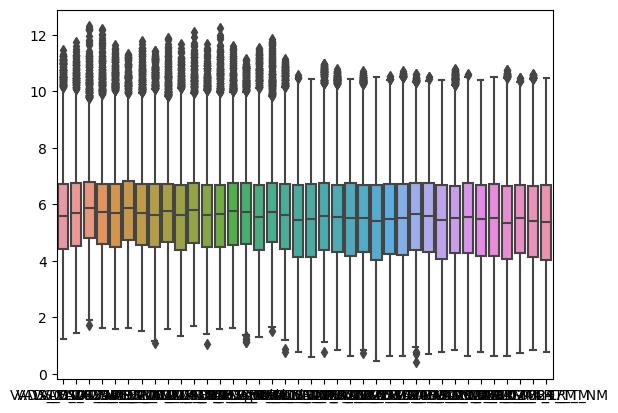

In [3]:
sns.boxplot(d)

In [4]:
rank_mean = d.stack().groupby(d.rank(method='first').stack().astype(int)).mean()
d_norm = d.rank(method='min').stack().astype(int).map(rank_mean).unstack()


<Axes: >

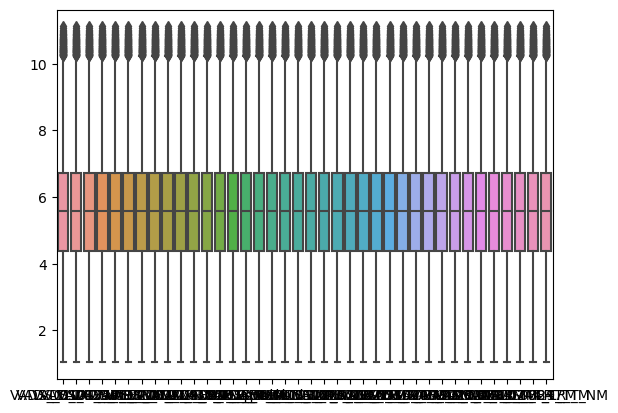

In [5]:
sns.boxplot(d_norm)

In [6]:
pd.DataFrame.to_csv(d_norm.T, 'datasets/hypopharynx/GSE2379_all_samples_log_qnorm.txt', sep='\t')

### Read matrices generated in R

In [52]:
from IFD_tsne import *
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from utils import MidpointNormalize, load_data
import matplotlib.pyplot as plt
import tikzplotlib

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

#plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(fontsizes.aistats2022())
plt.rcParams['axes.grid'] = False

In [53]:
selected_data = pd.read_csv('datasets/hypopharynx/selected_data.txt')
selected_data = selected_data.values
labels = pd.read_csv('datasets/hypopharynx/labels.txt', header=None)
labels = labels.values.flatten().tolist()
key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)


===> Finding 37 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.7193, 50 iterations in 0.3076 sec
Iteration  100, KL divergence 0.5981, 50 iterations in 0.2626 sec
Iteration  150, KL divergence 0.6964, 50 iterations in 0.2626 sec
Iteration  200, KL divergence 0.5860, 50 iterations in 0.2599 sec
Iteration  250, KL divergence 0.5974, 50 iterations in 0.2607 sec
   --> Time elapsed: 1.35 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.0002, 50 iterations in 0.3625 sec
Iteration  100, KL divergence 0.0002, 50 iterations in 0.3677 sec
Iteration  150, KL divergence 0.0002, 50 iterations in 0.2498 sec
Iteration  200, KL divergence 0.0002, 50 iterations in 0.2699 sec
Iteration 

In [54]:
mean = pd.read_csv('datasets/hypopharynx/mean.txt')
cov1 = pd.read_csv('datasets/hypopharynx/cov1.txt')
cov2 = pd.read_csv('datasets/hypopharynx/cov2.txt')
print(mean.shape, cov1.shape, cov2.shape)


(5, 50) (5, 5) (50, 50)


In [55]:
import scipy
from utils import load_data
X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


Perplexity value 30 is too high. Using perplexity 1.33 instead


===> Finding 4 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.1797, 50 iterations in 0.3618 sec
Iteration  100, KL divergence 0.4368, 50 iterations in 0.2528 sec
Iteration  150, KL divergence 1.6398, 50 iterations in 0.2749 sec
Iteration  200, KL divergence 2.1217, 50 iterations in 0.2691 sec
Iteration  250, KL divergence 1.3110, 50 iterations in 0.2614 sec
   --> Time elapsed: 1.42 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 1.4746, 50 iterations in 0.2514 sec
Iteration  100, KL divergence 1.6764, 50 iterations in 0.2517 sec
Iteration  150, KL divergence 0.5233, 50 iterations in 0.2661 sec
Iteration  200, KL divergence 0.9844, 50 iterations in 0.2614 sec
Iteration  

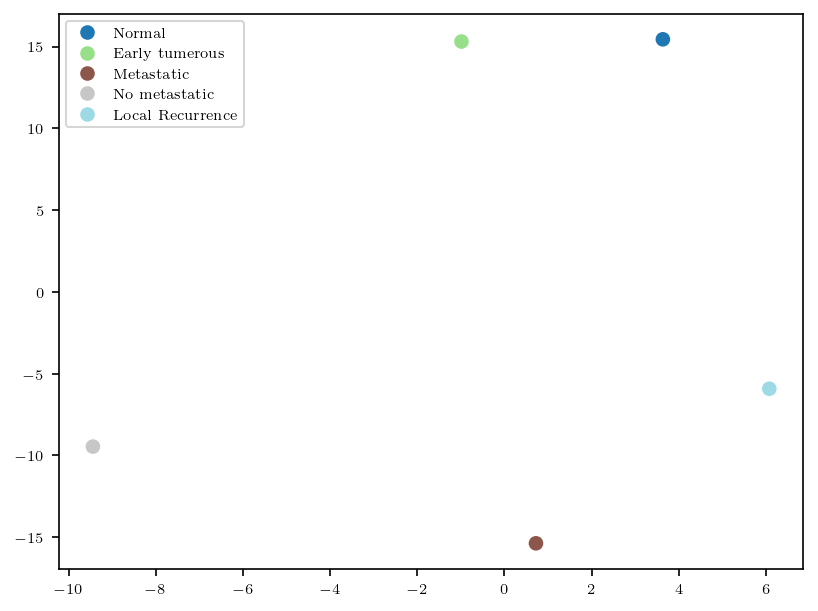

In [56]:
f, ax = plt.subplots()
scatter = ax.scatter(Y_star[:, 0], Y_star[:, 1], c=[i for i in range(Y_star.shape[0])], cmap='tab20')
plt.legend(handles=scatter.legend_elements()[0], labels=labels)


In [57]:
c = [i for i in range(Y_star.shape[0])]
cs = np.array([c, c]).T
cs_flat, _ = flatten_util.ravel_pytree(cs) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


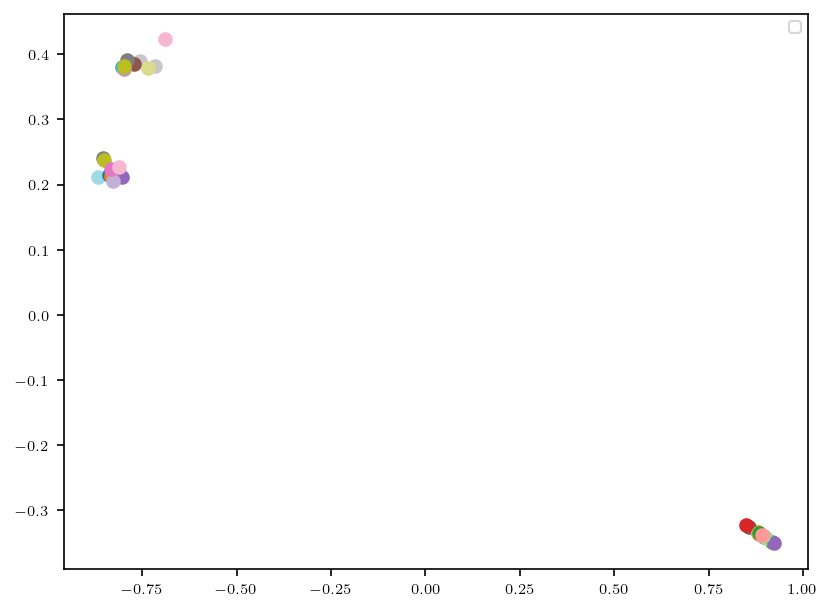

In [58]:
f = plt.figure()
for i, j in enumerate(selected_data_tsne):
  plt.scatter(*j)
plt.legend()

ValueError: 'c' argument has 10 elements, which is inconsistent with 'x' and 'y' with size 38.

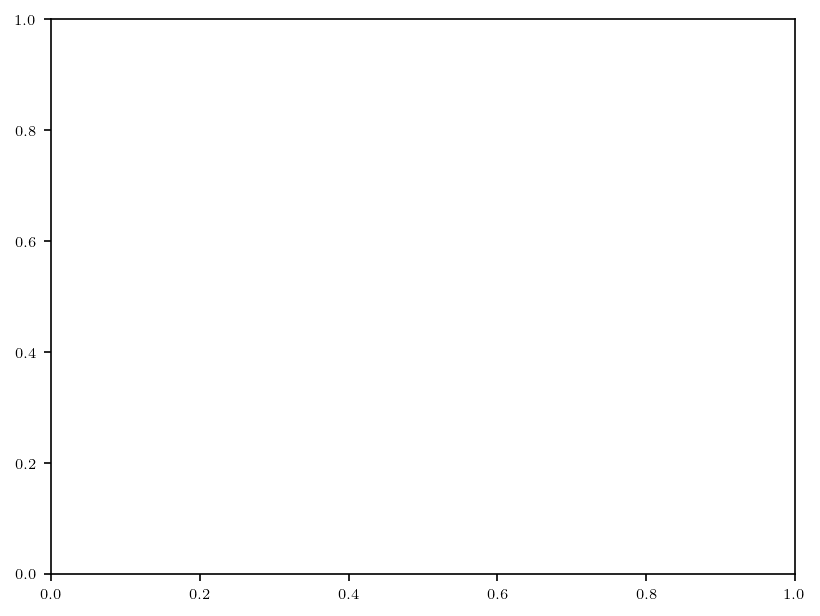

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
t = pca.fit_transform(selected_data)
f = plt.figure()
plt.scatter(*t.T, c = cs_flat, cmap='tab20')

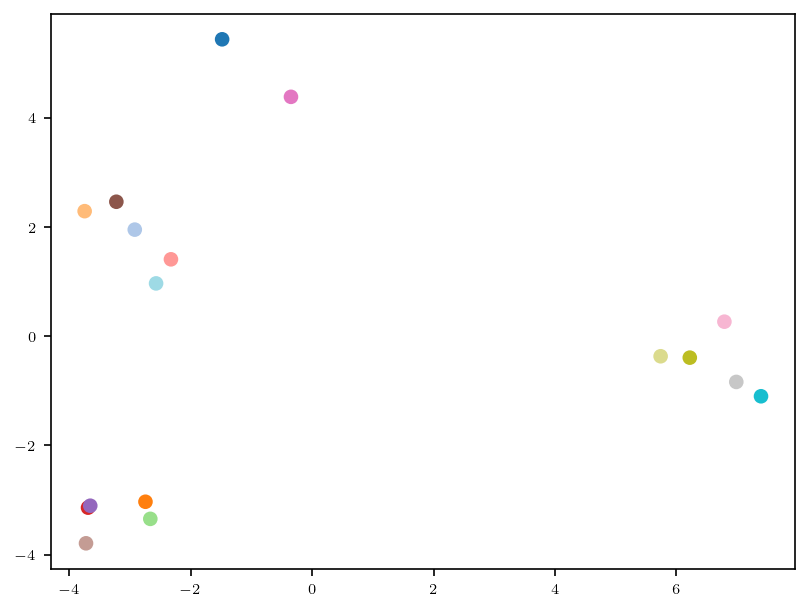

In [ ]:
pca = PCA(n_components = 2)
t = pca.fit_transform(X)
f = plt.figure()
plt.scatter(*t.T, c = [i for i in range(X.shape[0])], cmap = 'tab20')

In [60]:
def KL_divergence(X_flat, Y_flat, X_unflattener, Y_unflattener):
    """
    (R^nxp x R^nxp)--> R
    """
    X = X_unflattener(X_flat)
    Y = Y_unflattener(Y_flat)
    learning_rate, perplexity = (200, 1.33)
    P = x2p(X, tol=1e-5, perplexity=perplexity)
    P = (P + np.transpose(P))
    P = P / np.sum(P)      # Why don't we devide by 2N as described everywhere?
    P = np.maximum(P, 1e-12)
    Q, _ = y2q(Y)
    return np.sum(P * (np.log(P+1e-10) - np.log(Q+1e-10)))

primals = (X_flat, Y_flat)
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

In [61]:
J_X_Y = jacfwd(KL_divergence, argnums=0)(X_flat, Y_flat, X_unflattener, Y_unflattener)
print(J_X_Y)

Computing pairwise distances...
Starting binary search
Entered binary search function
[-2.75157485e-03 -1.67717168e-03 -2.76692532e-04  2.48846924e-03
  3.08147026e-03  3.07175331e-03 -2.63624382e-03  2.03608768e-03
  3.69288749e-03  2.47872248e-03  2.24868418e-03  2.94388854e-03
 -1.92480651e-03 -1.41203124e-03  2.07259343e-03  2.63028778e-03
 -3.72108864e-03 -2.89553101e-03 -7.28745945e-04 -1.86563237e-03
  2.66868458e-03  4.51543572e-04  2.57278117e-03  2.55127740e-03
  2.59621255e-03 -3.68930562e-03 -3.96870746e-04 -2.83206999e-03
 -2.62066326e-03  1.04105484e-03  3.47559992e-03 -1.70558132e-03
  3.83270439e-03  3.13617871e-03  1.62689085e-03 -4.38124128e-03
 -2.77419481e-03 -1.38838356e-03  3.67687503e-03 -1.66682340e-03
  2.82741478e-03  2.27239612e-03 -3.92575283e-03 -2.65243649e-03
 -5.15987864e-04  1.69307610e-03 -3.70008498e-03 -4.73768264e-03
  1.64706470e-03  1.90244871e-03 -2.58116424e-03 -4.47117782e-04
 -6.81440288e-04  2.38224398e-03  3.04015516e-03  3.55775468e-03
 -1.

In [62]:
from pseudo_IFD_tsne import *

fun = lambda y: KL_divergence(X_flat, y, X_unflattener, Y_unflattener)

In [63]:
H = jax.hessian(fun)(Y_flat)
H_pinv = np.linalg.pinv(H, hermitian=True)

Computing pairwise distances...
Starting binary search
Entered binary search function


In [64]:
M = np.eye(len(Y_flat))
time_start = time.time()
dy_dx = M_d_y_star_d_x_P(KL_divergence_fun, primals, M, H_pinv)
time_end = time.time()
print(time_end - time_start)

Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function
0.4138681888580322


In [65]:
cov_final = np.dot(np.dot(dy_dx, np.kron(cov2.values, cov1.values)), dy_dx.T)
cov_final = cov_final+1e-3*np.eye(len(cov_final))

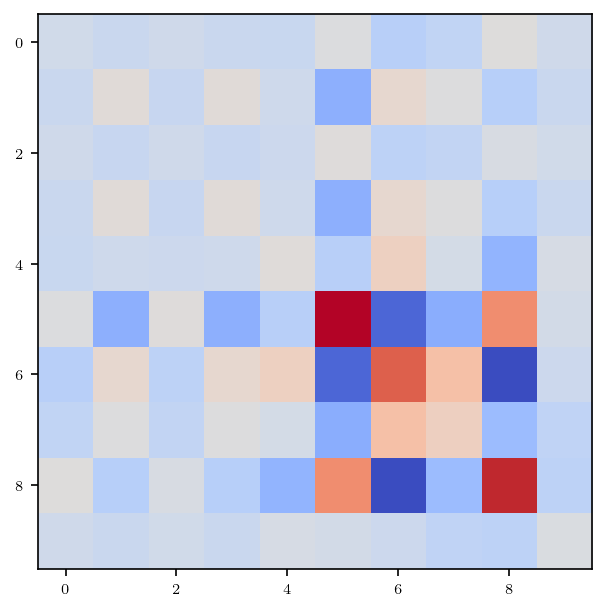

In [66]:
plt.imshow(cov_final, cmap='coolwarm')


In [67]:
from utils import equipotential_standard_normal

S = equipotential_standard_normal(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
Y_star_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_star_flat)

/Users/zabel/projects/tsne/diss/utils.py:83: RuntimeWarning: invalid value encountered in divide
  M = np.dot(mu, np.expand_dims(np.cos(theta), axis=0)) + E * np.sin(theta) / theta


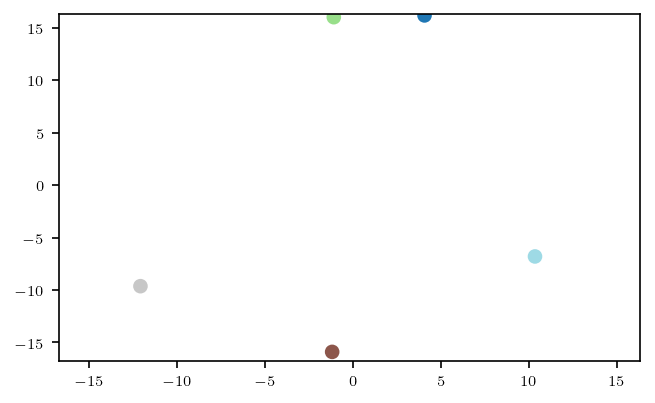

In [68]:
from animate_ifd import *
animate(samples, [i for i in range(Y_star.shape[0])], 'datasets/hypopharynx/animation.gif')

(100, 10)


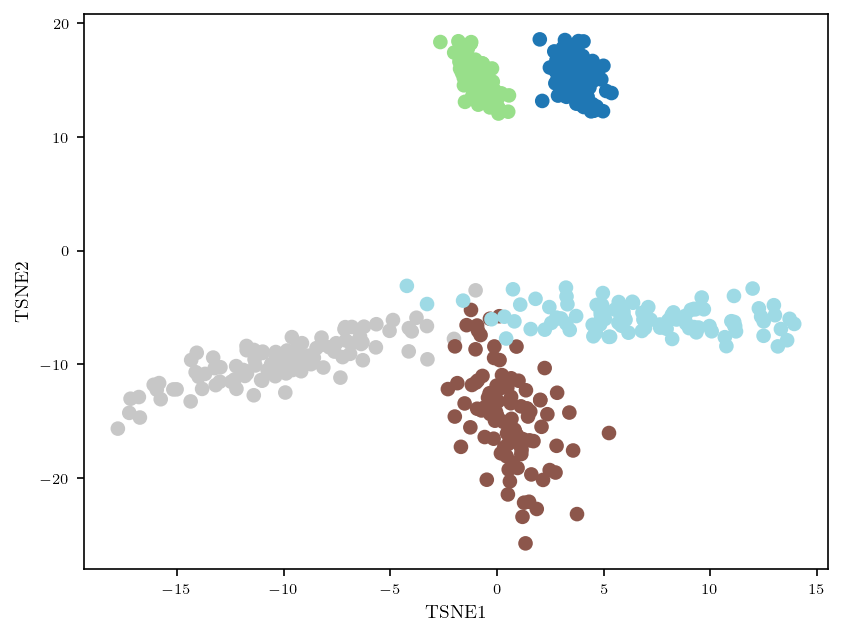

In [69]:
draw_and_plot_samples(Y_flat, Y_unflattener, cov_final, 100, 'tnse_distr.pdf')